
Electric Vehicle Eligibility

Lifecycle of the Machine Learning Project

•	Understanding the Problem Statement
•	Data Collection
•	Exploratory Data Analysis
•	Data Cleaning
•	Data Preprocessing
•	Model Training
•	Selection of the best Model


About
The Washington state Department of Licensing (DOL) has both Battery Electric Vehicles (BEVs) and Plug-in Hybrid Vehicles (PHEVs) that are registered under it. Clean Alternative Fuel Vehicle (CAFV) Eligibility is based on the fuel requirement and electric-only range requirement as outlined in RCW 82.08.809 and RCW 82.12.809 to be eligible for Alternative Fuel Vehicles retail sales.

A battery Electric Vehicle is an all-electric vehicle in which one or more batteries have been installed so they can store electrical energy that powers the motor and to restore the discharged power they are plugged to an electrical mains. However, a Plug-in Hybrid Electric Vehicle (PHEVs) have one or more batteries embedded in them to power an electric motor, but uses another fuel like diesel or gas to power an internal combustion engine; and is charged via plugging in to an electric power source.


In [ ]:
1.	Problem statement
•	As outlined in the RCW 82 the state of Washington gives clean alternative eligibility criteria based on the fuel requirements and electric-only range needs before certifying a vehicle for Alternative Fuel Vehicles retail sales and Washington state use tax exemption.
•	In this project a machine learning model will be built to categorize vehicles as clean alternative fuel vehicles eligible or not based on their fuel requirement and electric-only range. 
•	This model can be used to if a vehicle can be approved for clean alternative vehicle category and then for sales tax exemption clearance.



2. Data Collection:
This dataset was collected from the State of Washington office of the Department of Licensing (DOL)

The data consists of 17 rows and 250659 columns.


2.1 Import Data and Required Libraries


In [4]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
# Loading the dataset into dataframe

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [6]:
# dimesnionalty of the dataset
df.shape

(250659, 17)

Dataset Summary

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,250653.000000,250659.000000,250638.000000,250638.000000,250076.000000,2.506590e+05,2.506530e+05
mean,98176.796089,2021.628252,44.073002,727.403107,28.994994,2.392132e+08,5.297386e+10
std,2555.064640,3.021254,82.412875,6917.315299,14.862288,6.671019e+07,1.618543e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.111858e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,33.000000,2.575374e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.728702e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [8]:
# Check the features datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

3. Exploratory Data Analysis

In [10]:
# Segregate the dataset into numerical and categorical features

numerical_features = [f for f in df.columns if df[f].dtype !="O"]
categorical_features = [f for f in df.columns if df[f].dtype == "O"]

# Provide the numbers of numerical and categorical features
print("There are {} numerical features : {}".format(len(numerical_features), numerical_features))
print("There are {} categorical features : {}".format(len(categorical_features), categorical_features))



There are 7 numerical features : ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
There are 10 categorical features : ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [ ]:
# proportion of data count for categorical features

for f in categorical_features:
    print(df[f].value_counts(normalize=True) * 100)
    print("=============================================")

VIN (1-10)
7SAYGDEE7P    0.475945
7SAYGDEE6P    0.471956
7SAYGDEEXP    0.467966
7SAYGDEE5P    0.459190
7SAYGDEE2P    0.455998
                ...   
WBS83FK07T    0.000399
KM8KR4AE7N    0.000399
KMHC05LH2H    0.000399
3GNKDKRJ2S    0.000399
YV4H60CVXP    0.000399
Name: proportion, Length: 15108, dtype: float64
County
King          49.554962
Snohomish     12.380063
Pierce         8.309895
Clark          6.095678
Thurston       3.660439
                ...    
Kane           0.000399
Hall           0.000399
Sussex         0.000399
Olmsted        0.000399
Barnstable     0.000399
Name: proportion, Length: 225, dtype: float64
City
Seattle             15.865759
Bellevue             4.868882
Vancouver            3.719086
Redmond              3.452183
Bothell              3.292600
                      ...    
Saratoga Springs     0.000399
Foley                0.000399
Durango              0.000399
Warner Robins        0.000399
Pocatello            0.000399
Name: proportion, Length: 822, dtype

•	VIN (1-10), DOL Vehicle ID, will not have any importance on the classifier algorithm and they have unique values for each column
•	Vehicle location column will be dropped because the text with coordinates is redundant with city/county
•	Since the Geographic numeric Id is not meaningful for prediction the 2020 Census track will be dropped 
•	Since the state is that of Washington, the state column will be dropped
•	The County, City, and postal code column will be dropped after the EDA so we can study some regional trends


In [11]:
# Drop the columns that fall within the categorical features
categorical_drop = ['VIN (1-10)', 'Vehicle Location', 'State']

for c in categorical_drop:
    if c in categorical_features:
        categorical_features.remove(c)
    
print(categorical_features)


['County', 'City', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


In [12]:
# same for numerical feature

numerical_drop = ['2020 Census Tract', 'DOL Vehicle ID']

for n in numerical_drop:
    if n in numerical_features:
        numerical_features.remove(n)
print(numerical_features)


['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']


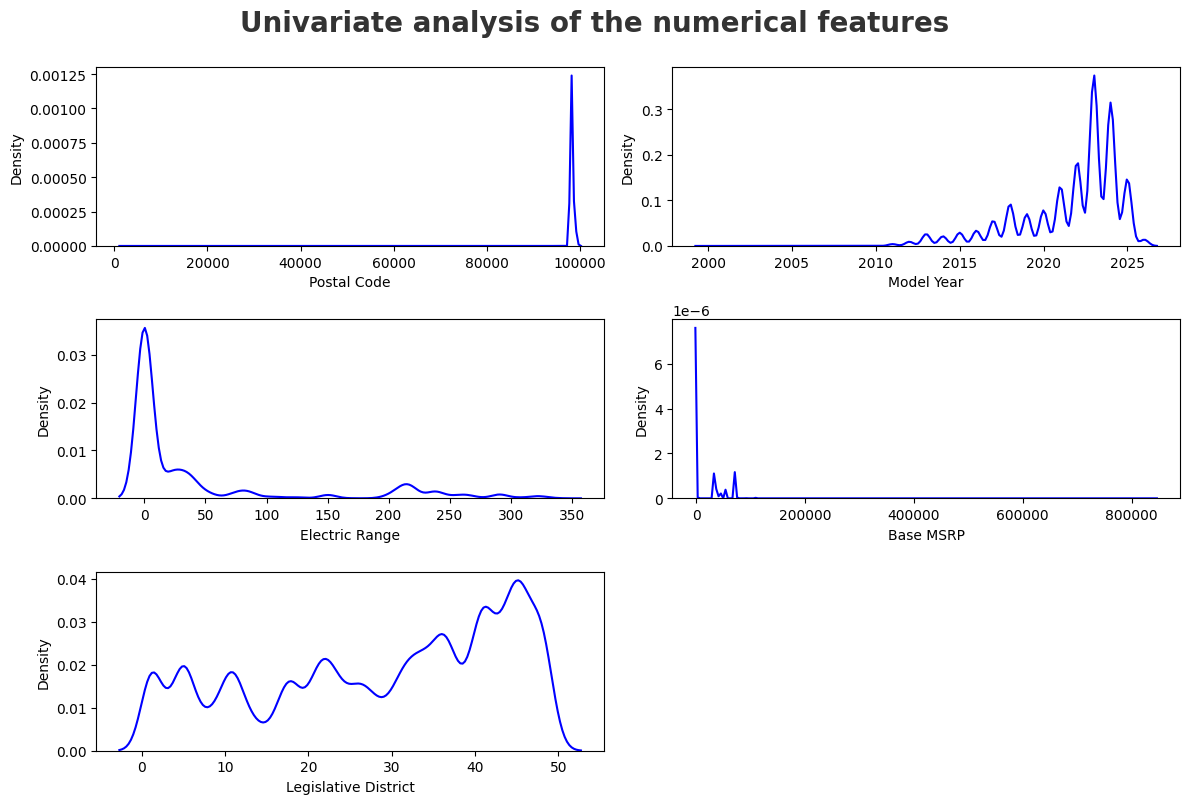

In [15]:
# Univariate analysis of the numerical features
import math
n = len(numerical_features)
rows = math.ceil(n / 2)
plt.figure(figsize=(12, 8))
plt.suptitle('Univariate analysis of the numerical features', fontsize =20, fontweight = 'bold', alpha =0.8, y =1.)

for i  in range(n):
    plt.subplot(rows, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


Insights

1. Postal code
• The density for the postal code is heavily concentrated near 100,000, which corresponds to  Washington State postal codes (e.g., 98xxx range).
• Since postal codes are categorical identifiers, this column isn’t useful numerically, it should be dropped or converted at to regions if you want to capture location influence.
Action: Drop from numerical analysis (or treat as categorical if needed).

2. Model Year
•	The model year distribution rises sharply from 2010 to 2025, peaking between 2020–2024.
•	This reflects the recent growth of EVs since most vehicles are newer models.
Insight: Most EVs are modern (last 5–7 years).
Action: Keep, this is likely a strong predictor of EV type (BEV vs PHEV).

3. Electric Range
•	The distribution shows a high peak near 0–50 miles and smaller humps up to 350 miles.
•	This means:
    *  Many plug-in hybrids (PHEVs) have low range (20–50 mi).
    *  Battery EVs (BEVs) have higher range (200–350 mi).
 Insight: Electric Range will be highly discriminative for classification.
 Action: Keep, key feature for predicting EV type or CAFV eligibility

4. Base MSRP
 •	Most values are clustered near 0–100,000, but the tail extends to very high values (800,000).
 •	The spike near 0 likely means missing or incorrectly recorded MSRP values (set as 0).
  Insight: Outliers and missing values exist.
  Action: Clean or impute (e.g., replace zeros with median MSRP per model or drop if too sparse).
  Also, consider log-scaling to normalize the skew.


5. Legislative District
 •	Values are spread roughly between 0–50, with mild peaks.
 •	Represents political/geographical regions in Washington.
 Insight: May correlate weakly with EV adoption patterns.
 Action: Optional,  can be included as a categorical variable (converted to integer category or one-hot encoding).
 
 





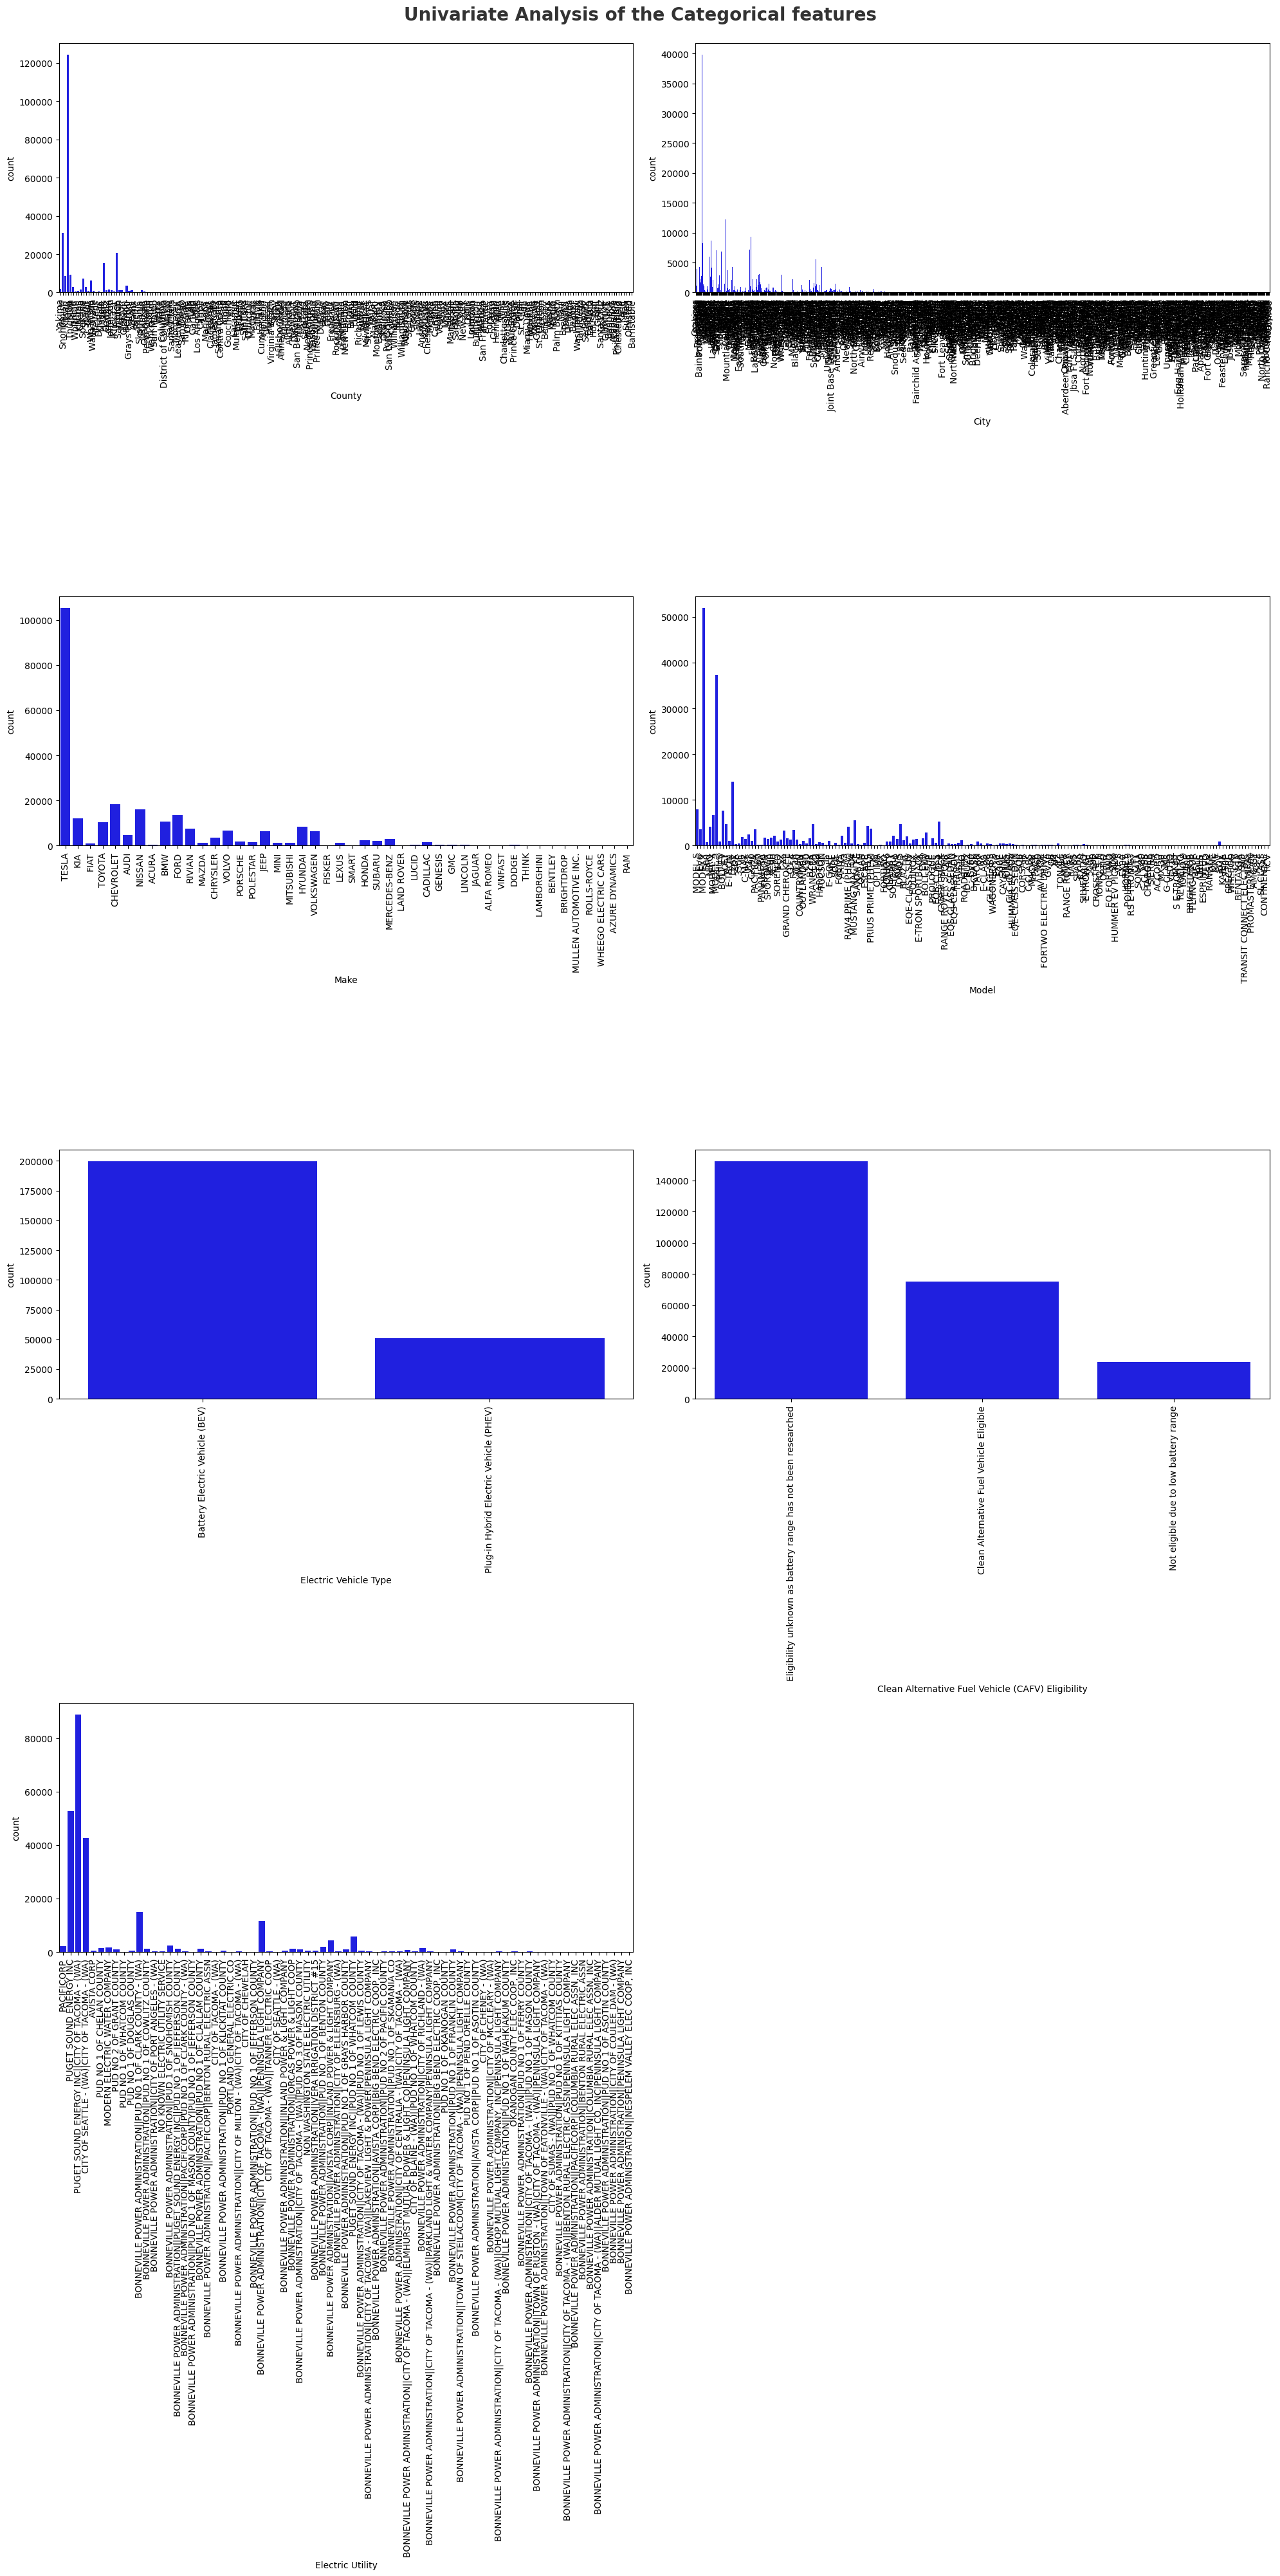

In [16]:
# Univariate analysis of the Categorical features

n = len(categorical_features)
row = math.ceil(n/2)
plt.figure(figsize=(20, 40))
plt.suptitle("Univariate Analysis of the Categorical features", fontsize=20, fontweight = 'bold', alpha=0.8, y=1.)

for i in range(n):
    plt.subplot(row, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], color='blue')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


Insights

General Observation

•	The dataset contains high-cardinality categorical columns like County, City, Make, Model, and Electric Utility.
•	Some categorical features are binary or low-cardinality (e.g., Electric Vehicle Type, CAFV Eligibility) — these are great candidates for classification targets or key predictors.

1. County
•	One or two counties dominate the dataset (e.g., King County).
•	Several counties have very few EVs.
    Insight: EV adoption is concentrated in a few urban counties.
    Action: If possible encode county or group the  rare ones as “Other.”

2. City
•	Extremely high cardinality — hundreds of cities.
•	Top few cities (e.g., Seattle, Bellevue, Redmond) dominate.
    Insight: Strong geographic imbalance.
    Action: If needed drop or keep only top 10 cities; others as “Other.”
 
3. Make
•  A few brands dominate: Tesla, Nissan, Chevrolet, Ford, BMW.
   Insight: Tesla appears most frequently.
   Action: Good predictor of EV Type or CAFV eligibility.
 
4. Model
•	Dozens of unique models — high-cardinality.
•	Tesla’s models (Model 3, Model Y, etc.) likely dominate.
   Action: Encode top 10–15 models; group others as “Other.”
 
5. Electric Vehicle Type
•	Two categories:
	    Battery Electric Vehicle (BEV) (dominant)
	    Plug-in Hybrid Electric Vehicle (PHEV) (smaller share)
  Insight: This looks like a clean binary classification target.
  Action: This essence of this classification is to predict eligibility.
 
6. Clean Alternative Fuel Vehicle (CAFV) Eligibility
•	Three main statuses:
	Eligible
	Not Eligible
	Eligibility unknown
 Insight: This is the main classification target (multiclass).
Action: This could predicted using range, make, model, etc.
 
7. Electric Utility
•	Very high-cardinality (many local utilities).
  Insight: Possible regional correlation, but too fragmented.
 Action: Either drop or keep only major utilities (e.g., Puget Sound Energy).




Multivariate analysis of the Numrical features


In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
continuous_feature = [feature for feature in numerical_features if len(df[feature].unique())>25]

print("We have {} discrete features : {}". format(len(discrete_features), discrete_features))
print("we have {} continuous features : {}".format(len(continuous_feature), continuous_feature))

We have 1 discrete features : ['Model Year']
we have 4 continuous features : ['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District']


In [18]:
# Check the Multicollinearity for categorical features
# using chi-square

from scipy.stats import chi2_contingency
test_list = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], df[feature]))[1] < 0.05:
        test_list.append('Reject Null Hypothesis')
    else:
        test_list.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, test_list]).T
result.columns = ['column', 'Hypothesis Result']
result

,column,Hypothesis Result
0,County,Reject Null Hypothesis
1,City,Reject Null Hypothesis
2,Make,Reject Null Hypothesis
3,Model,Reject Null Hypothesis
4,Electric Vehicle Type,Reject Null Hypothesis
5,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Reject Null Hypothesis
6,Electric Utility,Reject Null Hypothesis


Insight.
The test shows that all the categorical column does correlate with he target column. 

In [19]:
# Check for Null values

df.isnull().sum()

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64

Distribution of Numerical features By Clean Alternative Fuel Vehicle Eligibility


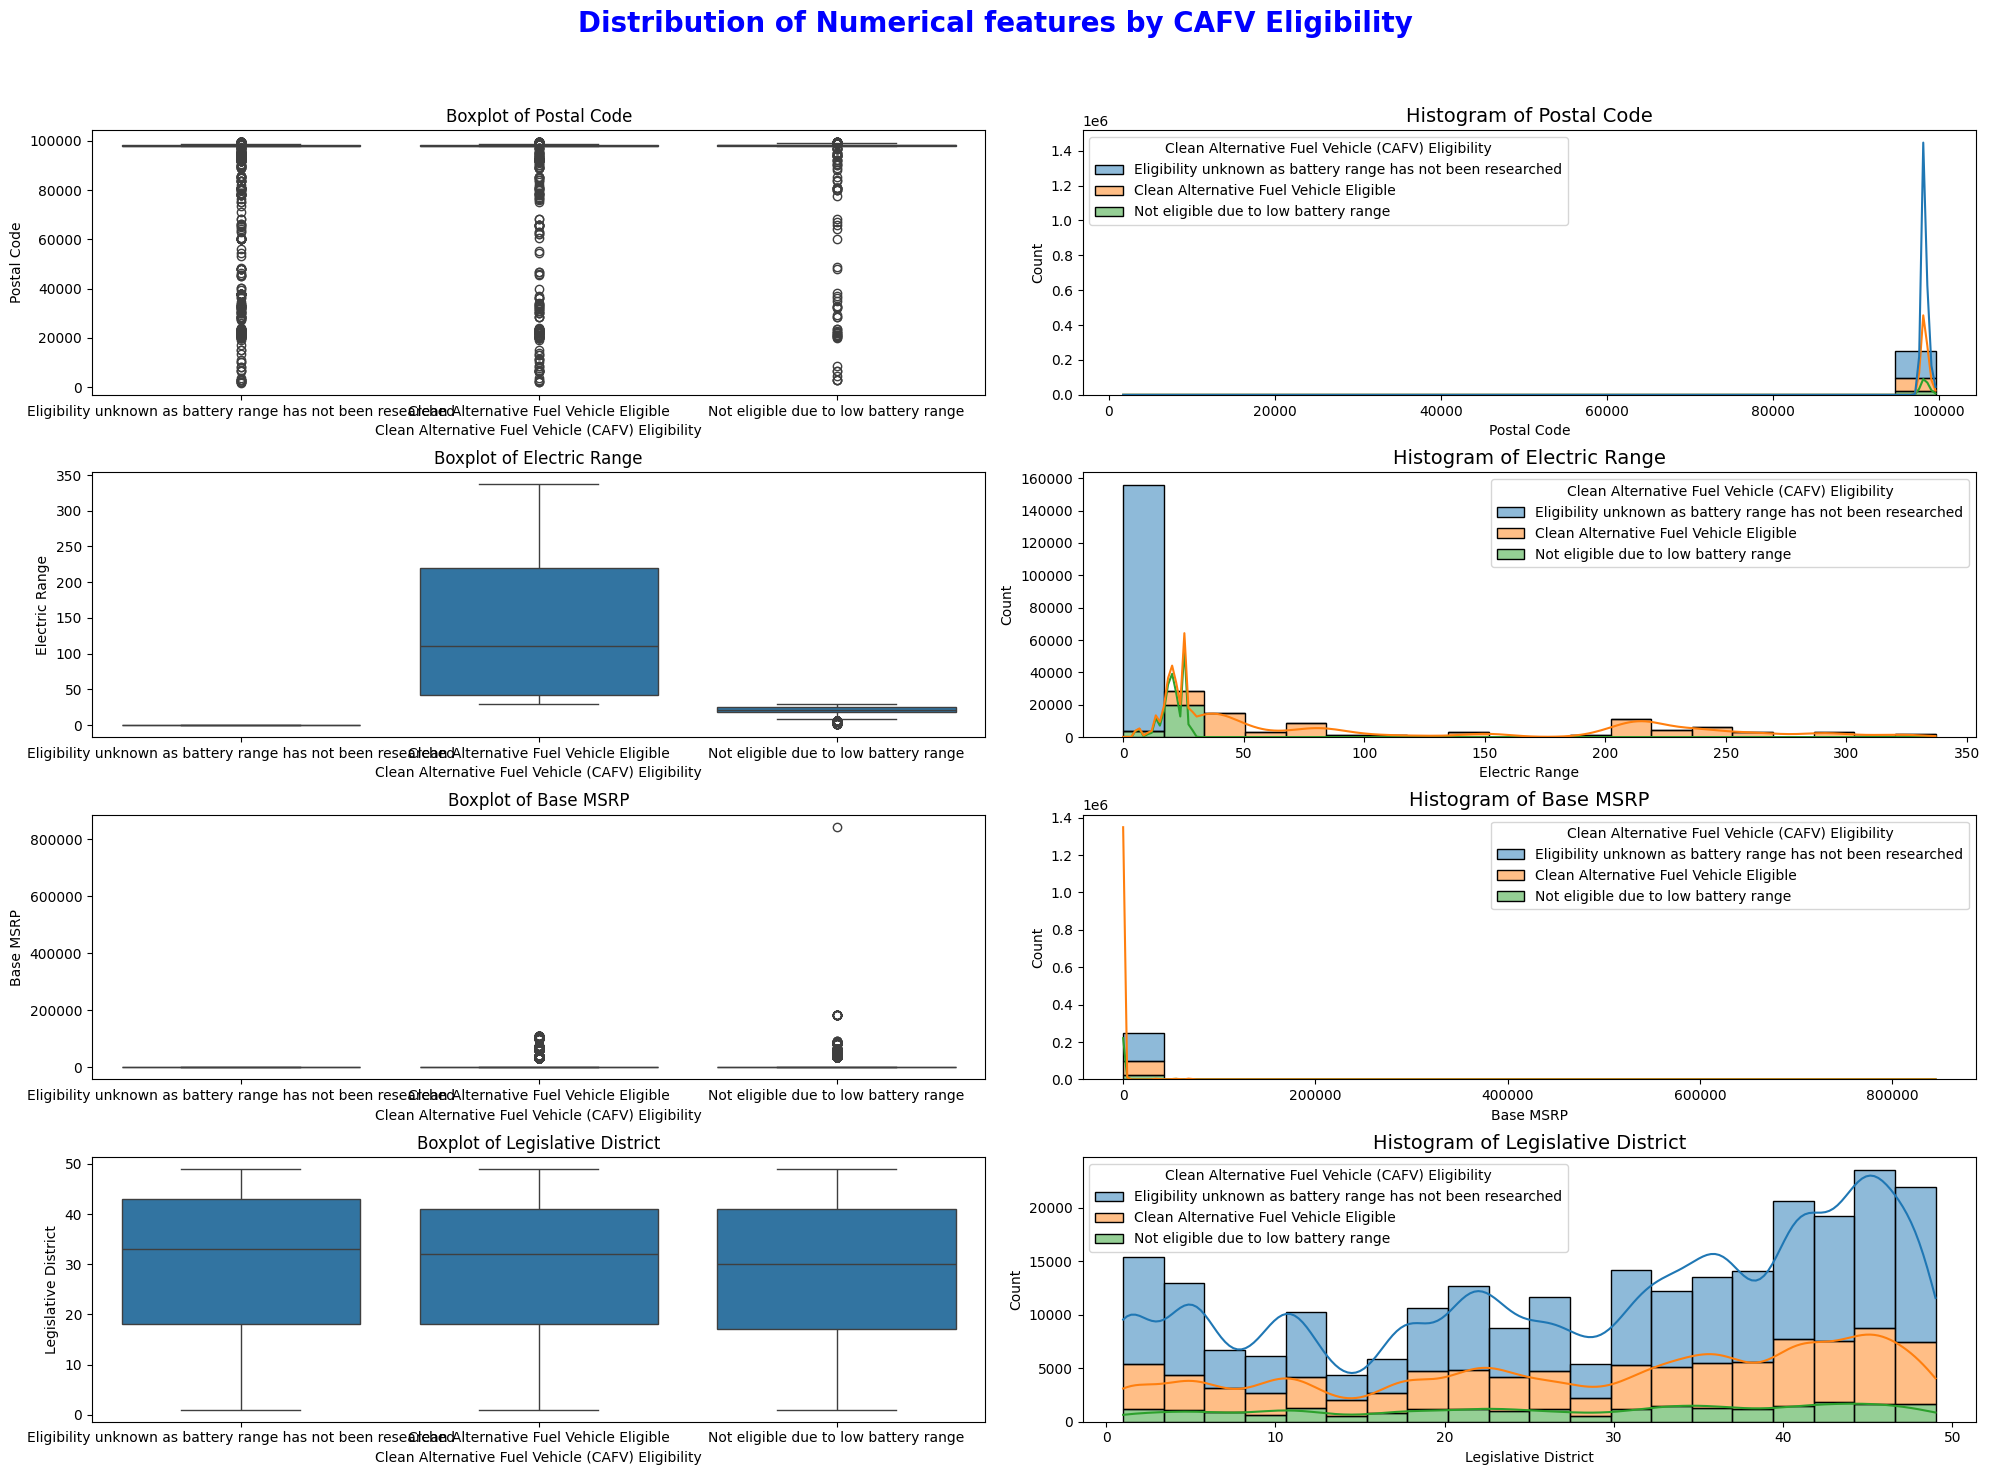

In [20]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('Distribution of Numerical features by CAFV Eligibility', color = 'blue', fontsize = 20, fontweight= 'bold', ha='center')

for i, col in enumerate(continuous_feature):
    sns.boxplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y=col, ax=ax[i, 0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', bins=20, kde=True, multiple='stack', ax=ax[i,1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

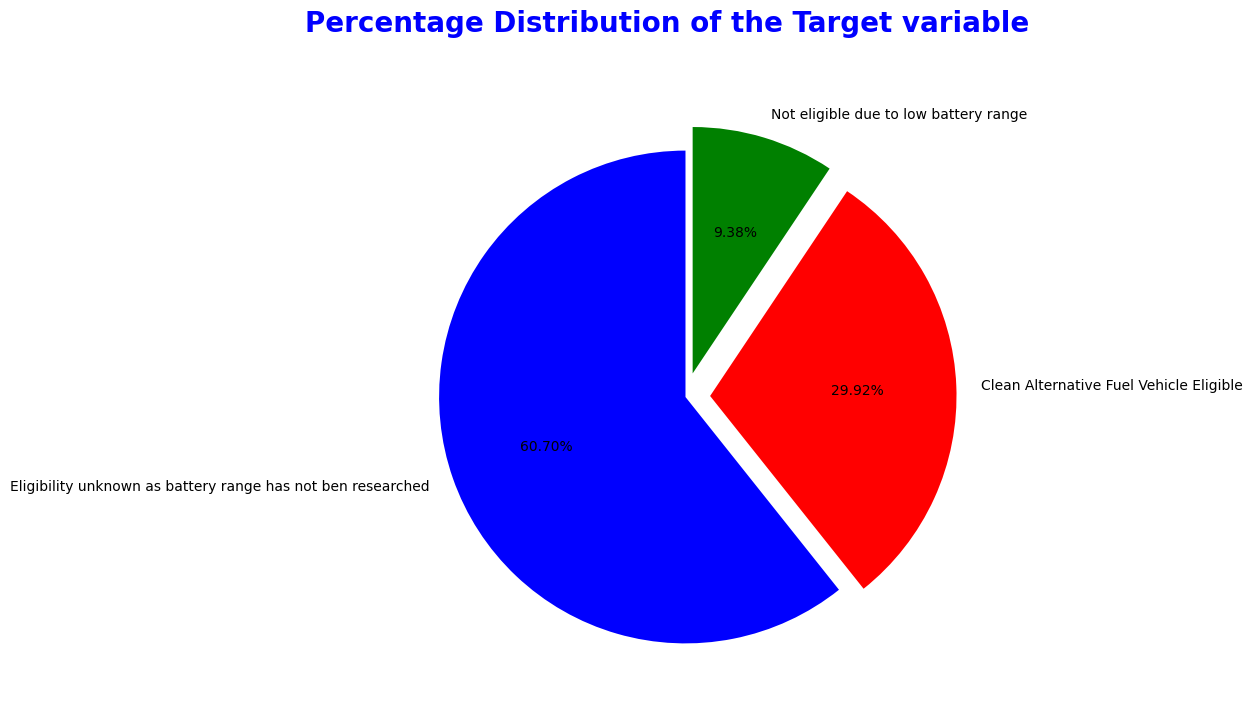

In [37]:
# The target distribution by percentages

value = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True)*100
target_column = ['Eligibility unknown as battery range has not ben researched', 'Clean Alternative Fuel Vehicle Eligible', 'Not eligible due to low battery range']

fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Percentage Distribution of the Target variable', color = 'blue', fontsize = 20, fontweight= 'bold', ha='center')
explode = (0, 0.1, 0.1)
colors = ['blue', 'red', 'green']
ax.pie(value, labels=target_column, startangle=90, autopct='%1.2f%%', explode=explode, colors=colors)
plt.show()

The target is imbalanced, this will be addressed at feature engineering.

In [23]:
# verify wether each EV Model has an impact on the eligibiity

df.groupby('Make')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).to_frame()*100

proportion
Make                 Clean Alternative Fuel Vehicle (CAFV) Eligibility             
ACURA                Eligibility unknown as battery range has not be...  100.000000
ALFA ROMEO           Clean Alternative Fuel Vehicle Eligible             100.000000
AUDI                 Not eligible due to low battery range                42.549020
                     Eligibility unknown as battery range has not be...   41.350763
                     Clean Alternative Fuel Vehicle Eligible              16.100218
...                                                                             ...
VOLKSWAGEN           Clean Alternative Fuel Vehicle Eligible              16.424822
VOLVO                Clean Alternative Fuel Vehicle Eligible              37.001522
                     Eligibility unknown as battery range has not be...   34.277017
                     Not eligible due to low battery range                28.721461
WHEEGO ELECTRIC CARS Clean Alternative Fuel Vehicle Eligible             100.000000

[87 rows x 1 columns]

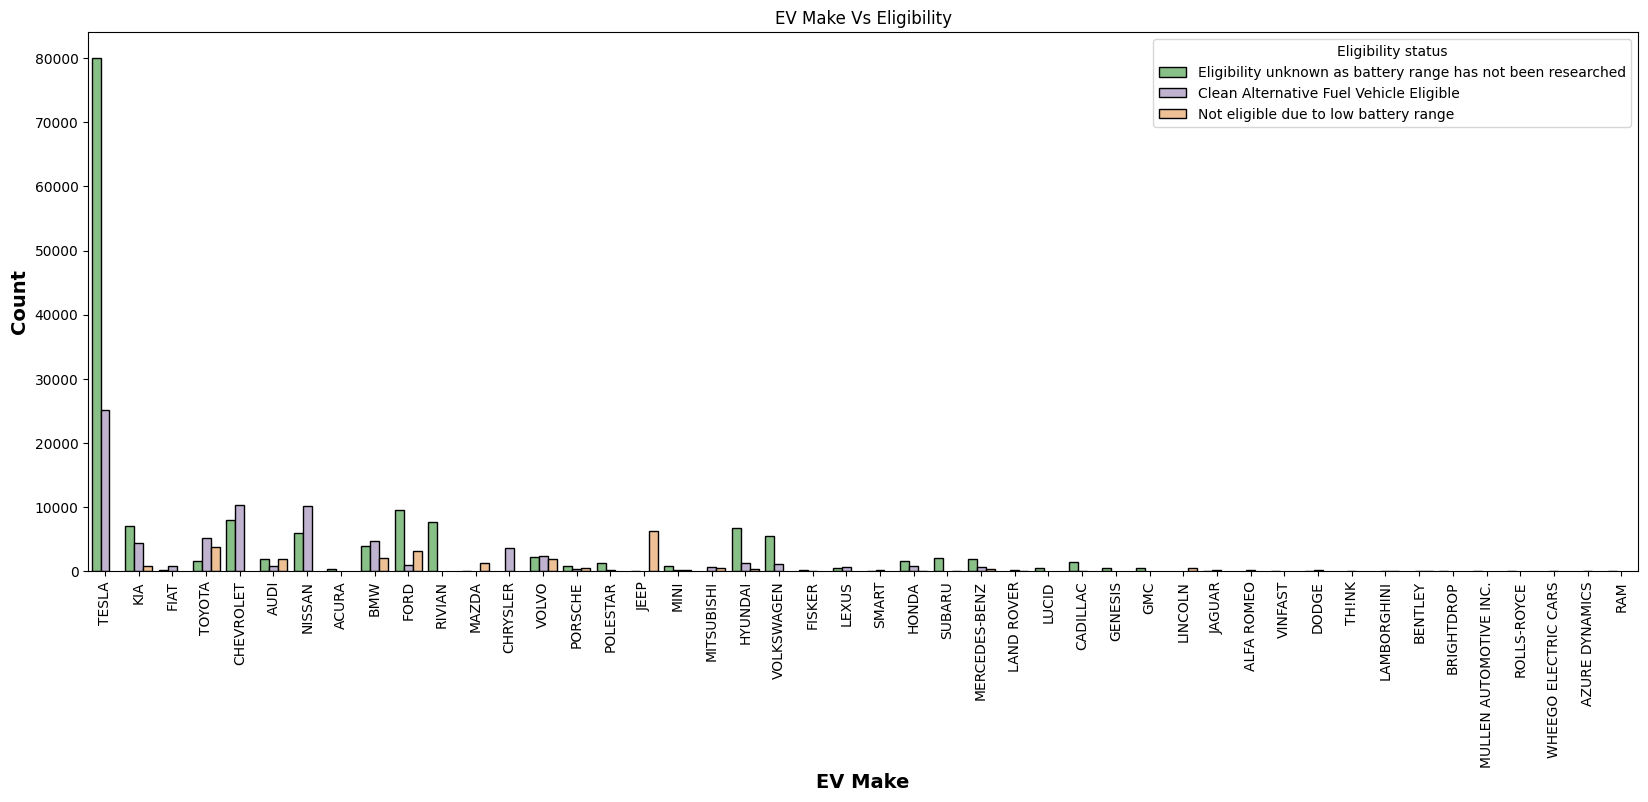

In [28]:
plt.subplots(figsize=(20, 7))
sns.countplot(x="Make", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", data=df, ec="black", palette="Accent")
plt.title("EV Make Vs Eligibility")
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("EV Make", weight = "bold", fontsize = 14)
plt.legend(title="Eligibility status", fancybox=True)
plt.xticks(rotation=90)
plt.show()

In [29]:

# Percentage of Eligibilty by Car make

df_copy = df.copy()

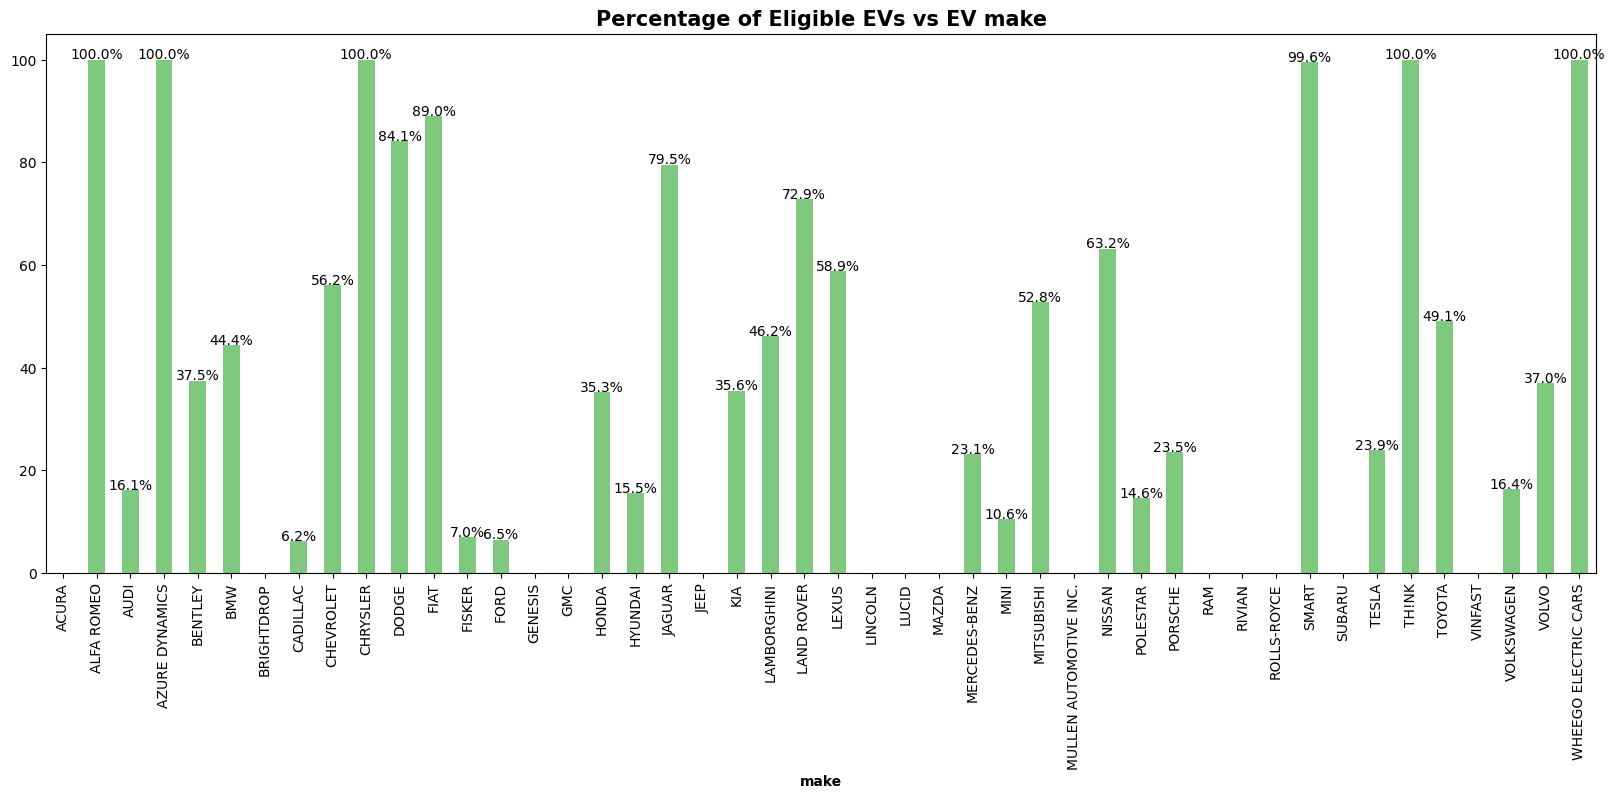

In [30]:
plt.figure(figsize=(20, 7))

(100*df_copy[df_copy["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isin(['Clean Alternative Fuel Vehicle Eligible'])]['Make'].value_counts()/df_copy['Make'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Eligible EVs vs EV make" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df_copy[df_copy["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isin(['Clean Alternative Fuel Vehicle Eligible'])]['Make'].value_counts()/df_copy['Make'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('make' , fontweight ='bold')
plt.xticks(rotation=90)
plt.show()

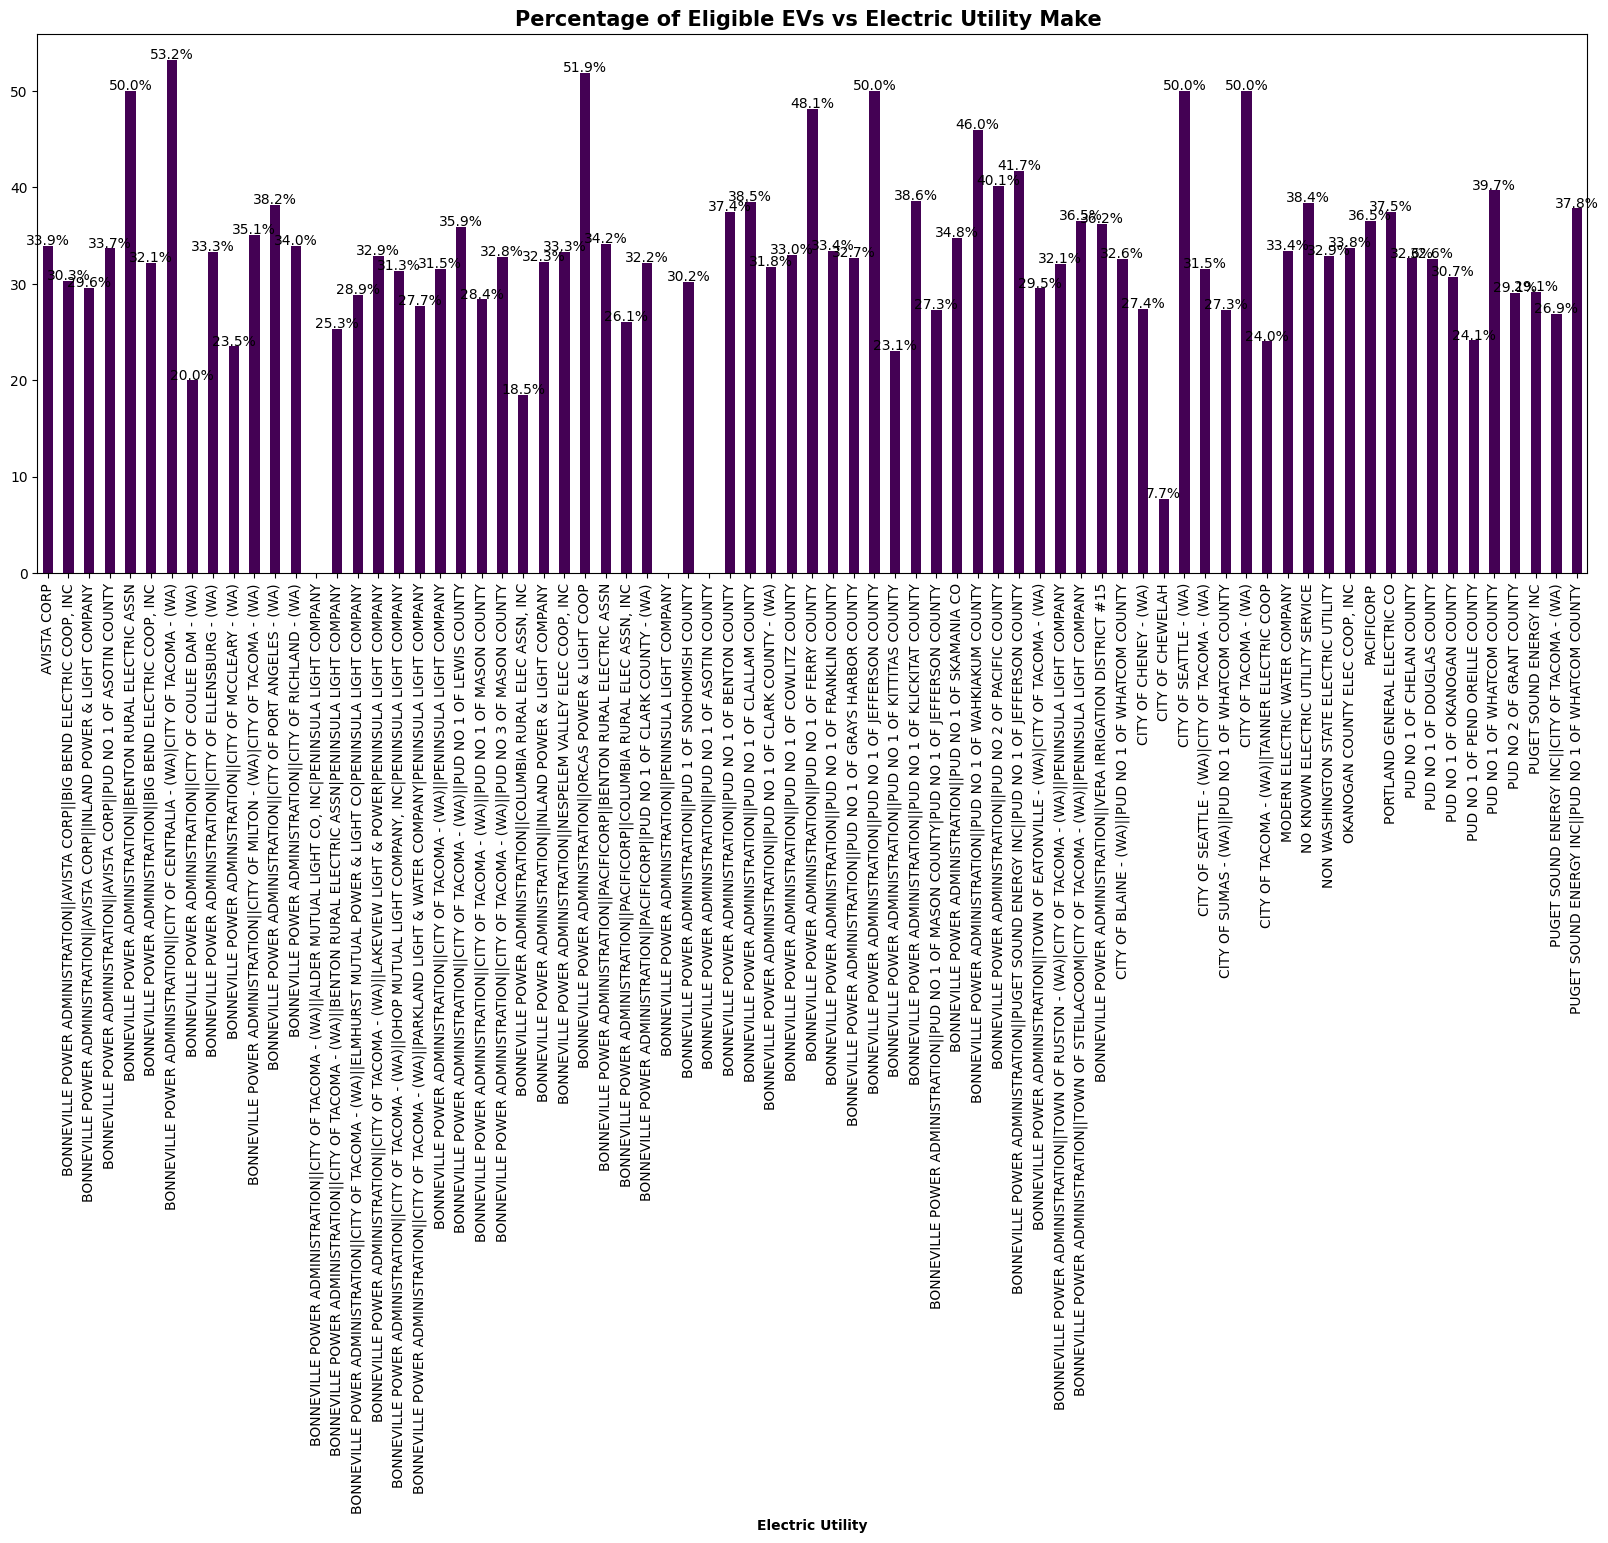

In [35]:
# Apply same to explore the percentage of EVs that are considered clean based on Electric utility

plt.figure(figsize=(20, 7))

(100*df_copy[df_copy["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isin(['Clean Alternative Fuel Vehicle Eligible'])]['Electric Utility'].value_counts()/df_copy['Electric Utility'].value_counts()).plot(
    kind='bar',stacked=True , colormap='viridis')
plt.title("Percentage of Eligible EVs vs Electric Utility Make " , fontsize = 15, fontweight ='bold'  )
order1 = (100*df_copy[df_copy["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isin(['Clean Alternative Fuel Vehicle Eligible'])]['Electric Utility'].value_counts()/df_copy['Electric Utility'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Electric Utility' , fontweight ='bold')
plt.xticks(rotation=90)
plt.show()

The following columns will be dropped in the Feature Engineering cycle.

VIN (1-10), DOL Vehicle ID, Vehicle location, 2020 Census track, state, County, City, and postal code. 

In [36]:
######=======Feature Engineering will be carried out in the next notebook=====###